Crop Health class distribution: Counter({np.int64(2): 50, np.int64(1): 45, np.int64(0): 5})
Pest Risk class distribution: Counter({np.int64(0): 50, np.int64(2): 45, np.int64(1): 5})
🌱 Crop Health Classification Report
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00         3
    Moderate       0.60      1.00      0.75         6
      Severe       1.00      0.91      0.95        11

    accuracy                           0.80        20
   macro avg       0.53      0.64      0.57        20
weighted avg       0.73      0.80      0.75        20

Accuracy (Health): 0.8
Macro F1 (Health): 0.5674603174603174

🪲 Pest Risk Classification Report
              precision    recall  f1-score   support

        High       1.00      0.91      0.95        11
         Low       0.00      0.00      0.00         3
      Medium       0.60      1.00      0.75         6

    accuracy                           0.80        20
   macro avg       0.53      0.64

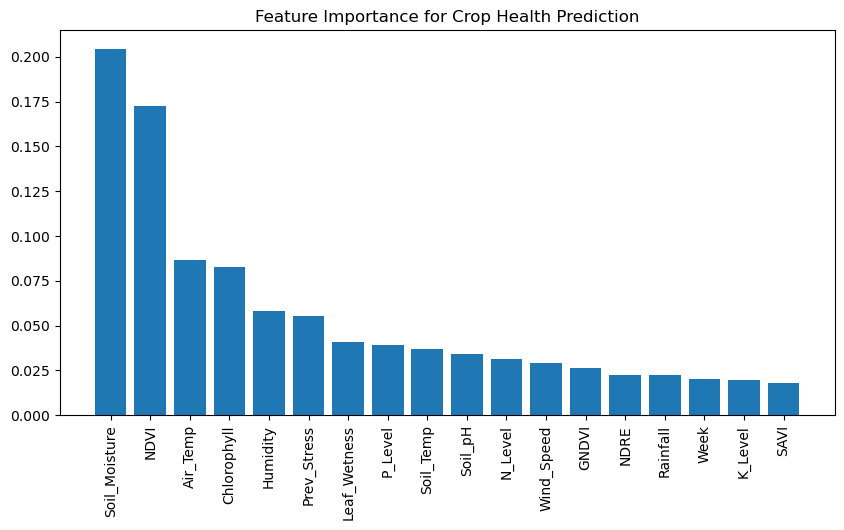

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
from collections import Counter

# 1. Load Dataset
df = pd.read_csv("crop_health_dataset.csv")

# 2. Features & Labels
X = df.drop(["Crop_Health", "Pest_Risk"], axis=1)

# Encode labels
le_health = LabelEncoder()
le_pest = LabelEncoder()

y_health = le_health.fit_transform(df["Crop_Health"])
y_pest = le_pest.fit_transform(df["Pest_Risk"])

# 🔍 Check class balance
print("Crop Health class distribution:", Counter(y_health))
print("Pest Risk class distribution:", Counter(y_pest))



# 3. Train-Test Split
X_train, X_test, y_health_train, y_health_test, y_pest_train, y_pest_test = train_test_split(
    X, y_health, y_pest, test_size=0.2, random_state=42
)

# 4. Train Random Forest for Crop Health
rf_health = RandomForestClassifier(
    n_estimators=300, max_depth=12, random_state=42, class_weight="balanced"
)
rf_health.fit(X_train, y_health_train)

# 5. Train Random Forest for Pest Risk
rf_pest = RandomForestClassifier(
    n_estimators=300, max_depth=12, random_state=42, class_weight="balanced"
)
rf_pest.fit(X_train, y_pest_train)

# 6. Predictions
y_health_pred = rf_health.predict(X_test)
y_pest_pred = rf_pest.predict(X_test)

# 7. Evaluation
print("🌱 Crop Health Classification Report")
print(classification_report(y_health_test, y_health_pred, target_names=le_health.classes_, zero_division=0))
print("Accuracy (Health):", accuracy_score(y_health_test, y_health_pred))
print("Macro F1 (Health):", f1_score(y_health_test, y_health_pred, average="macro"))

print("\n🪲 Pest Risk Classification Report")
print(classification_report(y_pest_test, y_pest_pred, target_names=le_pest.classes_, zero_division=0))
print("Accuracy (Pest Risk):", accuracy_score(y_pest_test, y_pest_pred))
print("Macro F1 (Pest Risk):", f1_score(y_pest_test, y_pest_pred, average="macro"))

# 8. Feature Importance (for Health model)
importances = rf_health.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importance for Crop Health Prediction")
plt.show()
